### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

I want to give a scenario to explain dependent and independent variable. Let us suppose a scientist wants to see if the intensity of sweetness has any effect on an ant being attracted to the sweet. The scientist can control the intensity of sweetness by making it dilute or concentrated. Thus, the sweetness is the independent variable. How the ant reacts to the intensity of sweetness would be the dependent variable.

In other words an independent variable is the variable whose value is changed or controlled in an experiment to test the effects on the dependent variable. On the other hand a dependent variable is the variable being tested and measured in an experiment. Another example: Number of Solved/Unsolved questions in exam could be independent variable while getting high/low score is dependent variable.

In Stroop Experiment, "Congruency(word and ink color are same)" and "Incongruency(word and ink color are different)" of the words are independent variables because they are on the control of the scientist performing the test. While, time taken to read those words is dependent variable because it depends on the congruency or Incongruency of the words. 


(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

As we expect there is difference in average time for two events(congruent and incongruent).
We should set up two hypothesis those are:

1) Null hypothesis(Ho) -> Average of two variables do not differ at alpha = 0.05.
2) Alternative hyothesis(H1) -> Average of two variables do differ at alpha = 0.05. 

Where alpha = 0.05 is a significant level.

#### Lets define mean of each sample. 

Lets say the targated population is U.

Two samples are:  "Congruent" -> x1

                    "Incongruent" -> x2

Population means are:  mC and mI respectively.

Mean of x1 -> x1_

Mean of x2 -> x2_ 

#### Mathematically hypotheses can be stated as below.

Ho: mC = mI

H1: mC != mI

If we prove Ho wrong then we did our job.

## Resons for choosing t- test not others.

#### a) We do not know the population standard deviation

#### b) The samples from one trial is used in the second trial (same participant is used to test the effect of the conditions - repeated measure), we will use the Dependent T-test for paired samples.

#### c) A t-test is a method used to see if two sets of data are significantly different in our case we will see if both sampeles has different mean or not

#### d) Size of the sample(n) is 24 i.e. n < 30

#### e) t test are most useful when we need to determine if there is a statistically significant difference between two independent sample groups. In our case "Congruent" and "Incongruent" are two independent sample groups.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
df = pd.read_csv("stroopdata.csv")
len(df) # Number of rows of df

24

In [2]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


#### Descriptive Statistics
Central tendency: the central point in the data set.
Veriability: the spread of the data set.
Mean, Median gives central tendency and standard deviation gives variability. In below output 'mean' gives mean and 'std' gives standard
deviation

In [3]:
df.describe() # This is similar to summary(df) in R
# Alternate way of finding mean and std is
# df.mean(), df.std()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [4]:
# Lets calculate variance as well
df.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

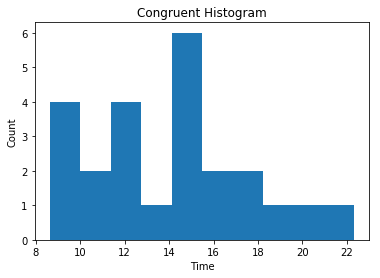

In [5]:
# Build the visualizations here
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
# draw historgram of attribute "Congruent".
plt.pyplot.hist(df["Congruent"])

# set x/y labels and plot title
plt.pyplot.xlabel("Time")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Congruent Histogram")

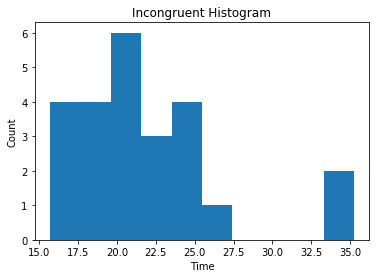

In [6]:
# Build the visualizations here
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
# draw historgram of attribute "Congruent".
plt.pyplot.hist(df["Incongruent"])

# set x/y labels and plot title
plt.pyplot.xlabel("Time")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Incongruent Histogram")

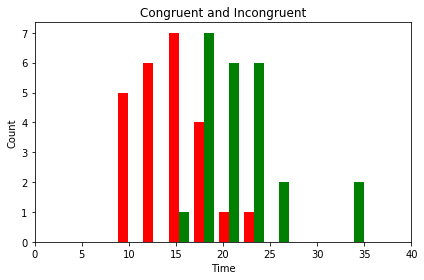

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# preparing the data
C = df["Congruent"]
I = df["Incongruent"]

# ploting two histograms together
fig, axis = plt.subplots()
axis.hist([C,I],color=['r','g'])
axis.set_xlim(0,40)
axis.set_ylabel("Count")
axis.set_xlabel("Time")
axis.set_title("Congruent and Incongruent")
plt.tight_layout()
plt.show()

From above 3 plots we can see that both data are not normally distributed.
Its seen that Congruent data is slightly more normally distributed than
Incongruent data. Nobody took time between 28 to 33 in Incongruent data.
In Congruent data time around 15 has higher frequency(7), for Incongruent
data time around 24 has higher frequency(7). 

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?


#### Suggestion from reviewer: 
One-sample and independent-samples t-tests do not match the design of the current experiment, 
since each participant completes each of the conditions. So dont do ttest_ind().

In [8]:
from scipy import stats
stats.ttest_rel(df["Congruent"], df["Incongruent"], axis=0)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

From above,  statistic = -8.020706944109957, p value = 4.1*10-08. 
From above we got p value= 4.1*10-08 means it is very very smaller than the significance level we set up(0.05). Which safely allow us to reject Null hypothesis we stated above. That leads us to the conclusion that "Average of our data sets(Congruent and Incongruent) are differ to each other". Which met our expectation. Hence, average of "Congruent" and "Incongruent" variables are significantly different. 

6) Optional
-> Time response of people for reading mirror image of numbers vs reading real numbers could be a topic for experiment. As much as I know it's always difficult to read mirror image than real object. 